In [1]:
%run iteration_01_0_imports.ipynb

In [2]:
%run iteration_01_0_parameters.ipynb

In [3]:
%run iteration_01_0_utils.ipynb

In [ ]:
PATH_DATA_LIST

In [4]:
df_path_img_sick = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_sick_img.csv")
df_path_img_healthy = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_healthy_img.csv")
df_path_img = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_img.csv")

## Image moyenne par classe 

In [5]:
# get array from image
IMG_IN_COLOR = 1
def img_mean(df_path_img):
    img_arr_sum = np.zeros((400,400,3))
    for path_img, _ in zip(df_path_img.path_img, tqdm(range(len(df_path_img.path_img)))):
        img_arr = cv2.imread(path_img, flags = IMG_IN_COLOR)

        img_arr_sum[:img_arr.shape[0],:img_arr.shape[1],:] += img_arr 
    
    return img_arr_sum / df_path_img.shape[0]
            

In [6]:
img_mean_healthy =  img_mean(df_path_img_healthy)

100%|█████████████████████████████████████████████████████████████████████████▉| 13778/13779 [00:07<00:00, 1782.16it/s]


In [7]:
img_mean_sick =  img_mean(df_path_img_sick)

100%|█████████████████████████████████████████████████████████████████████████▉| 13778/13779 [00:07<00:00, 1726.98it/s]


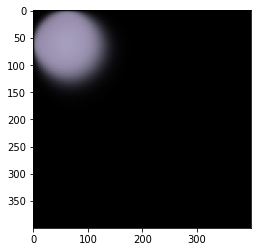

In [8]:
plt.imshow(img_mean_healthy.astype(np.uint8))

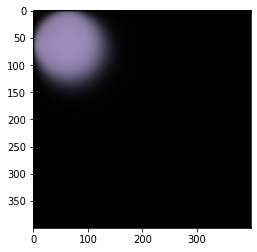

In [9]:
plt.imshow(img_mean_sick.astype(np.uint8))

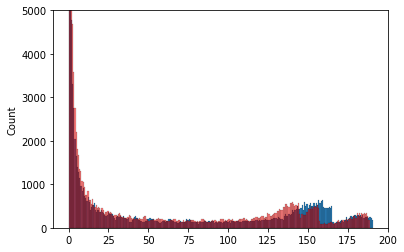

In [10]:
sns.histplot(img_mean_healthy.ravel(), bins = 256, alpha = 0.95)
sns.histplot(img_mean_sick.ravel(), bins = 256, color = "r",alpha = 0.5)
plt.ylim(0,5000)
plt.show()

In [ ]:
PATH_DATA_EDA
create_dir_hierarchy(PATH_DATA_EDA)

In [12]:
# https://www.thoughtco.com/using-pickle-to-save-objects-2813661
pickel_save(img_mean_healthy, PATH_DATA_EDA + "/" + "img_mean_healthy.pkl")
pickel_save(img_mean_sick, PATH_DATA_EDA + "/" + "img_mean_sick.pkl")